In [ ]:
#Importing train data

In [158]:
import numpy as np
import pandas as pd


train = pd.read_csv('https://raw.githubusercontent.com/Sethmckbot/ML-Final-Project/Ben/train_subset.csv')
print(train.shape)

(165, 20)


In [ ]:
#importing targets and getting just the true false value

In [159]:
labels = pd.read_csv('https://raw.githubusercontent.com/Sethmckbot/ML-Final-Project/Ben/train_labels_subset.csv')
print(labels.shape)
labels.head()

#tlabels = labels.drop(columns=['session_id'])
#print(tlabels.shape)
#tlabels.head()

(165, 2)


,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


In [ ]:
#displaying histogram of all numerical values pre trimming

In [160]:
cols = ['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level', 'page', 
            'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration', 
            'text', 'fqid', 'room_fqid', 'text_fqid', 'fullscreen', 'hq', 'music', 'level_group']
categorical_features = ['event_name', 'name','text', 'fqid', 'room_fqid', 'text_fqid','level_group']
numeric_features = [col for col in train.columns if col not in categorical_features]


#shown = train[numeric_features].hist(figsize=(20,30), layout=(5,4))

In [ ]:
#split data into levels so that we can take a few thousand from each level to create a smaller
#training set and make it easier to work with

In [107]:
level_1 = train[train['level_group'] == '0-4']
level_2 = train[train['level_group'] == '5-12']
level_3 = train[train['level_group'] == '13-22']

In [ ]:
#display the split levels

In [ ]:
level_1.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [ ]:
level_2.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
165,20090312431273200,175,221485,navigate_click,undefined,5,NaN,280.442178,-19.705837,653.0,321.0,NaN,NaN,boss,tunic.capitol_0.hall,NaN,0,0,1,5-12
166,20090312431273200,176,222334,person_click,basic,5,NaN,272.983492,-19.233581,649.0,321.0,NaN,"What are you still doing here, Jolie?",boss,tunic.capitol_0.hall,tunic.capitol_0.hall.boss.talktogramps,0,0,1,5-12
167,20090312431273200,177,223251,person_click,basic,5,NaN,240.848426,-228.217450,628.0,459.0,NaN,Go find your grampa and get to work!,boss,tunic.capitol_0.hall,tunic.capitol_0.hall.boss.talktogramps,0,0,1,5-12
168,20090312431273200,178,223735,navigate_click,undefined,5,NaN,331.714689,-220.627225,688.0,454.0,NaN,NaN,NaN,tunic.capitol_0.hall,NaN,0,0,1,5-12
169,20090312431273200,179,224235,navigate_click,undefined,5,NaN,404.147223,-226.491396,716.0,454.0,NaN,NaN,NaN,tunic.capitol_0.hall,NaN,0,0,1,5-12


In [ ]:
level_3.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
461,20090312431273200,512,836732,navigate_click,undefined,13,NaN,290.153549,-204.499365,651.0,445.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,0,0,1,13-22
462,20090312431273200,513,837245,navigate_click,undefined,13,NaN,353.805607,-210.332061,672.0,445.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,0,0,1,13-22
463,20090312431273200,514,837779,navigate_click,undefined,13,NaN,587.680024,-280.706245,780.0,489.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,0,0,1,13-22
464,20090312431273200,515,838446,navigate_click,undefined,13,NaN,751.496869,-102.153292,823.0,365.0,NaN,NaN,toentry,tunic.capitol_1.hall,NaN,0,0,1,13-22
465,20090312431273200,516,839629,map_hover,basic,13,NaN,NaN,NaN,NaN,NaN,67.0,NaN,tunic.drycleaner,tunic.capitol_1.hall,NaN,0,0,1,13-22


In [ ]:
#select random 10000 values from each group

In [ ]:
slevel_1 = level_1.sample(n=10000)
print(slevel_1.shape)
slevel_2 = level_2.sample(n=10000)
print(slevel_2.shape)
slevel_3 = level_3.sample(n=10000)
print(slevel_3.shape)

(10000, 20)
(10000, 20)
(10000, 20)


In [ ]:
#combine new smaller data size for the smaller train data set

In [ ]:
strain= slevel_1.append(slevel_2)
strain = strain.append(slevel_3)

C:\Users\mckee\AppData\Local\Temp\ipykernel_3180\1326163993.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  strain= slevel_1.append(slevel_2)
C:\Users\mckee\AppData\Local\Temp\ipykernel_3180\1326163993.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  strain = strain.append(slevel_3)


In [ ]:
#display histogram of numerical values post trim

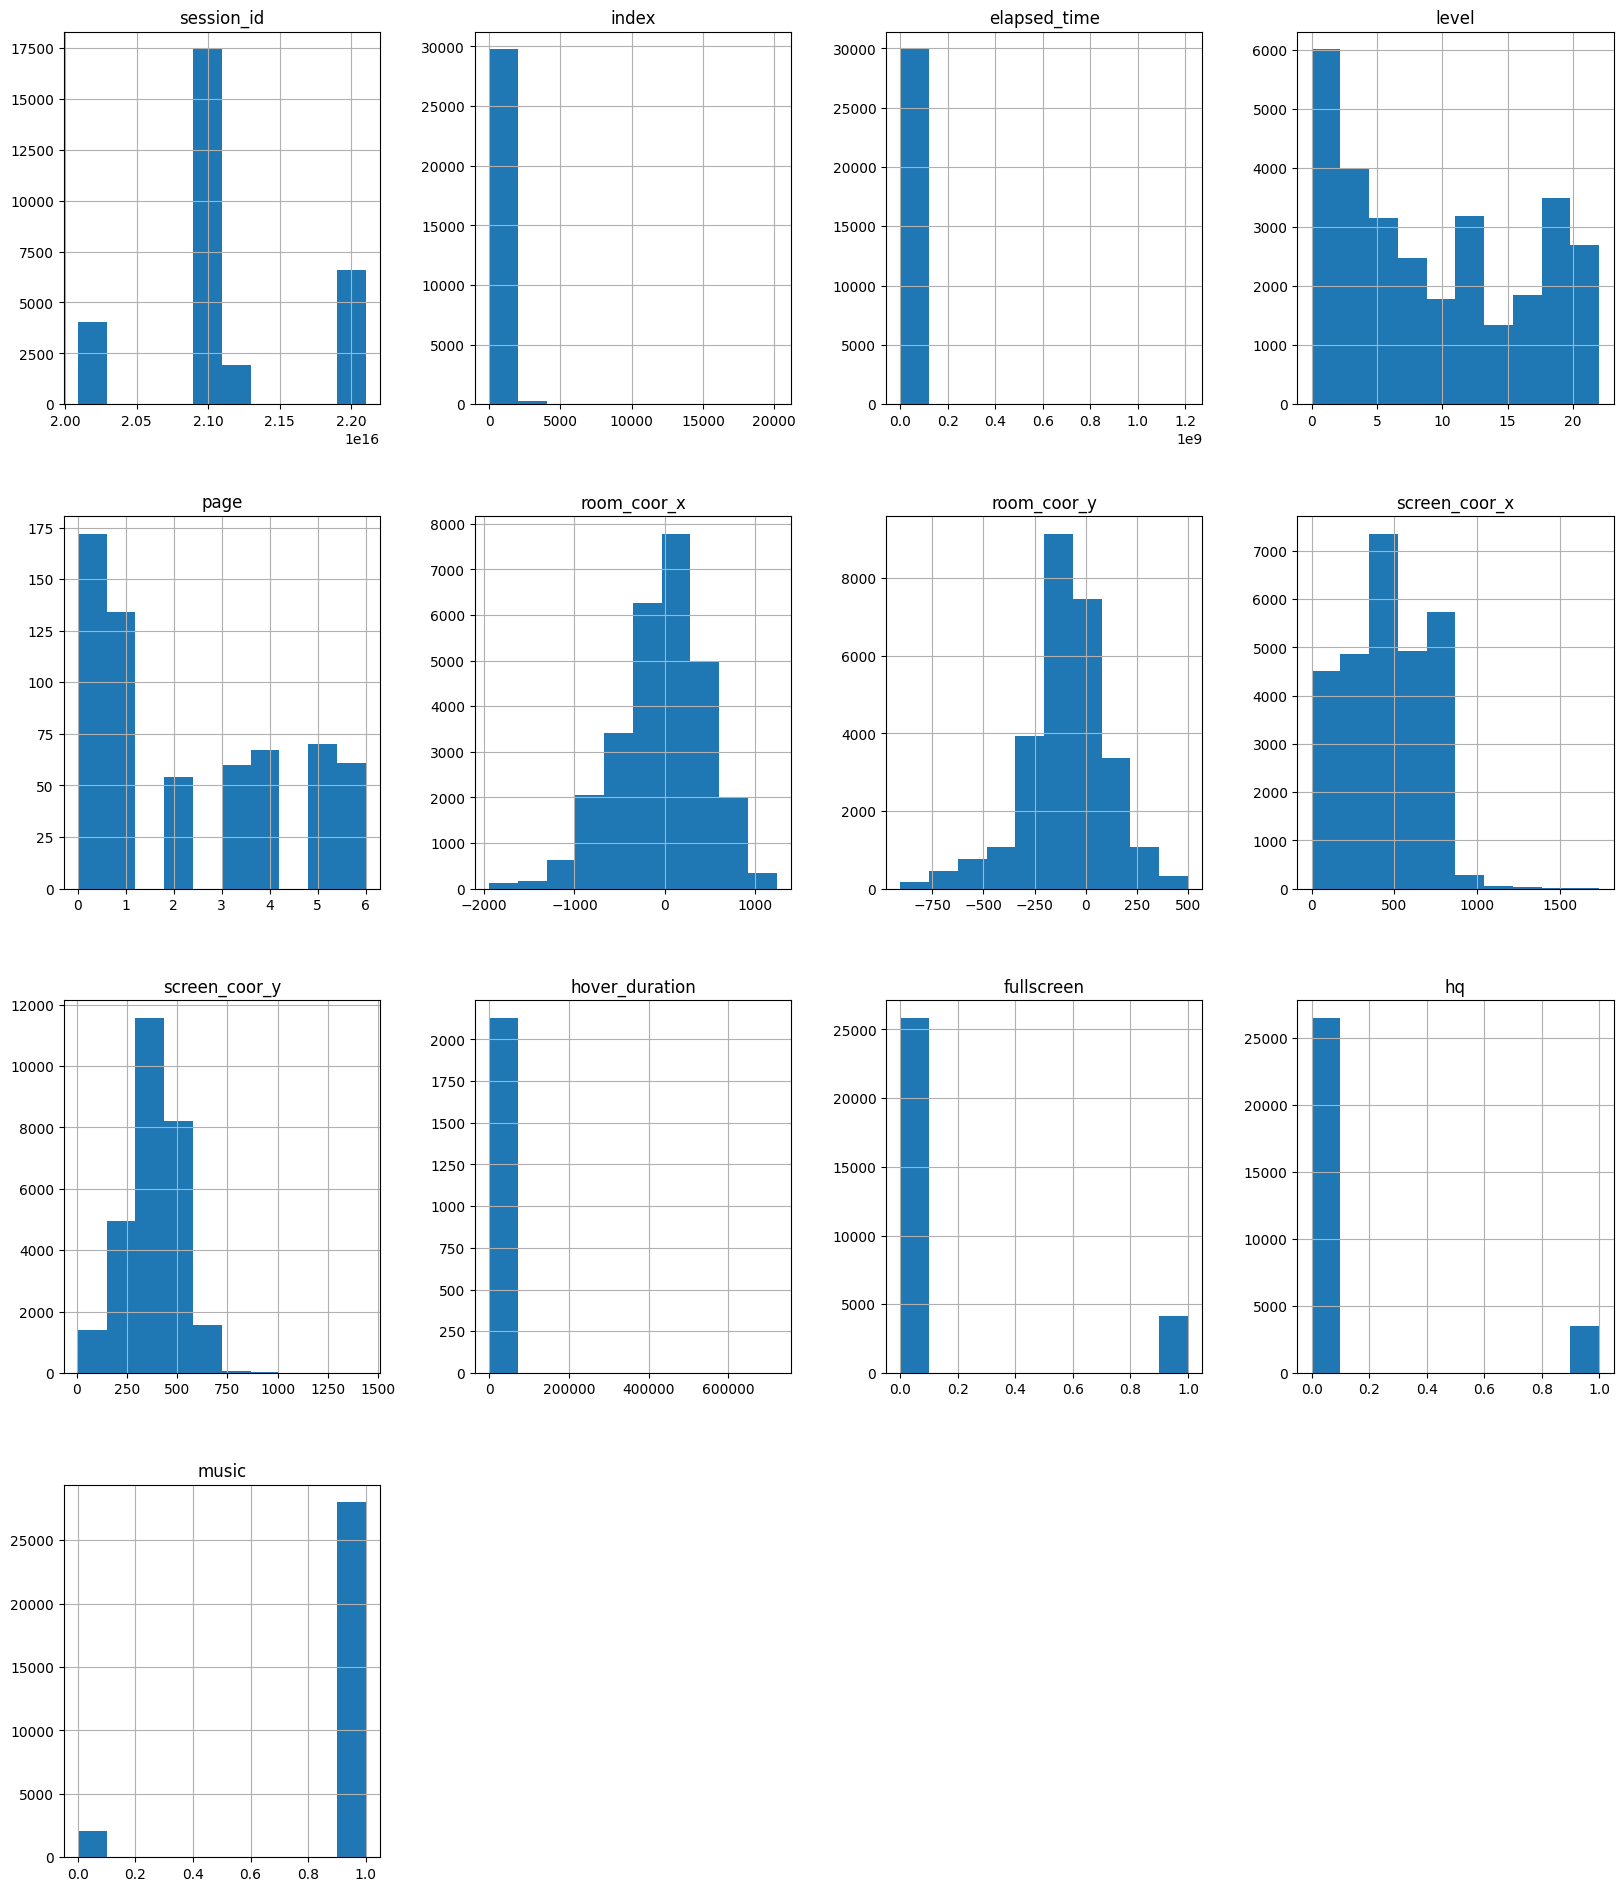

In [ ]:
shown = strain[numeric_features].hist(figsize=(20,30), layout=(5,4))

In [161]:
#try to convert catagorical data to numerical data
validation = pd.read_csv('https://raw.githubusercontent.com/Sethmckbot/ML-Final-Project/Ben/validation.csv')
validation_labels = pd.read_csv('https://raw.githubusercontent.com/Sethmckbot/ML-Final-Project/Ben/validation_labels.csv')

In [174]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

#encode categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
  train[feature] = label_encoder.fit_transform(train[feature])
  validation[feature] = label_encoder.fit_transform(validation[feature])

to_drop = ['page', 'hover_duration']
to_mean = ['fqid', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'text', 'text_fqid']

#hanlde na features(dropped)
for feature in to_drop:
  train.drop(feature, axis=1, inplace=True)
  validation.drop(feature, axis=1, inplace=True)

#train['room_coor_x'] = train['room_coor_x'].fillna(0)

#handle na features (fill with mean of column)
for feature in to_mean:
  t_mean = train[feature].mean()
  v_mean = validation[feature].mean()
  train[feature] = train[feature].fillna(0)
  validation[feature] = validation[feature].fillna(0)

y = labels['correct']

#testing different models
#gives accuracy 0.6265060240963856 without tuning
HGBClf = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
HGBClf.fit(train, y)
HGB_preds = HGBClf.predict(validation)

#gives accuracy 0.6626506024096386 without tuning
SGDClf = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(train, y)
SGD_preds = SGDClf.predict(validation)

#gives accuracy 0.5542168674698795 without tuning
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(train, y)
dtree_preds = dtree.predict(validation)

#get accuracy
correct = 0
count = 0
for i in SGD_preds:
  if i == y[count]:
    correct += 1
  count += 1

#show metrics
print("\naccuracy: ")
print(correct / len(SGD_preds))
print("\npredicted")
print(SGD_preds)
print("\ncorrect")
print(validation_labels)



accuracy: 
0.6626506024096386

predicted
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]

correct
    0
0   1
1   1
2   0
3   1
4   1
.. ..
77  1
78  1
79  1
80  1
81  1

[82 rows x 1 columns]
